In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.metrics import mean_squared_error

In [2]:
submission = pd.read_csv("sample_submission.csv")

In [3]:
submission.shape

(1459, 2)

In [4]:
train = pd.read_csv("train.csv")
train.shape

(1460, 81)

In [5]:
test = pd.read_csv("test.csv")
display(test.shape)
test.info()

(1459, 80)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [6]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

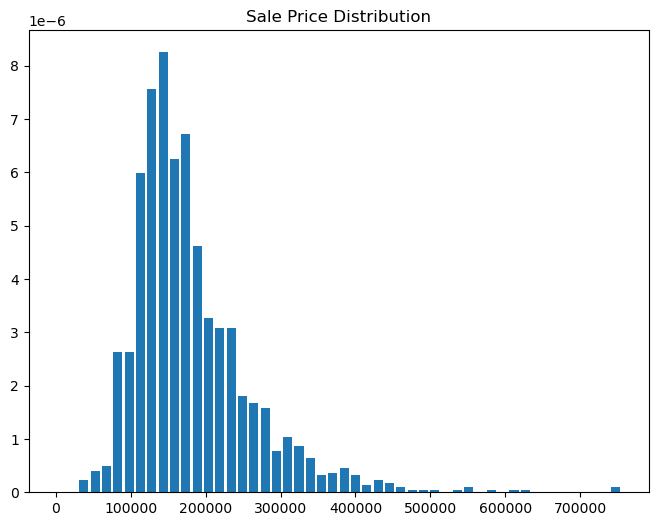

In [7]:
plt.figure(figsize=(8,6))
plt.hist(train.SalePrice, range=(0,755000), bins = 50, density = True, rwidth = 0.8)
plt.title("Sale Price Distribution");

In [8]:
col_drop = ["MiscFeature","Fence","PoolQC","FireplaceQu","MasVnrType", "Alley"]

train = train.drop(col_drop, axis = 1)

test = test.drop(col_drop, axis = 1)

In [9]:
num_cols = train.select_dtypes(include=["int64", "float64"]).drop(columns=["Id", "SalePrice"], axis=1).columns
cat_cols = train.select_dtypes(include=["object"]).columns

le = LabelEncoder()

for feature in num_cols:
    train[feature].fillna(train[feature].median(), inplace=True)
    test[feature].fillna(test[feature].median(), inplace=True)

for feature in cat_cols:
    train[feature].fillna(train[feature].mode()[0], inplace=True)
    test[feature].fillna(test[feature].mode()[0], inplace=True)
    train[feature] = le.fit_transform(train[feature].values)
    test[feature] = le.transform(test[feature].values)

In [10]:
feats = train.drop("SalePrice", axis = 1)
target = train["SalePrice"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(feats, target, test_size = 0.2, random_state = 42)

In [12]:
# Modélisation Random Forest et Gradient Boosting
rf = RandomForestRegressor()
gbx = GradientBoostingRegressor()

rf.fit(X_train, y_train)
score_rf = rf.score(X_test, y_test)
score_train_rf = rf.score(X_train,y_train)
print("Score Random Forest train:", score_train_rf)
print("Score Random Forest test:", score_rf)

gbx.fit(X_train, y_train)
score_gbx = gbx.score(X_test, y_test)
score_train_gbx = gbx.score(X_train, y_train)
print("Score Gradient Boosting train :",score_train_gbx)
print("Score Gradient Boosting test :", score_gbx)

 #Calcul du rmse
pred_rf = rf.predict(X_test)
pred_train_rf = rf.predict(X_train)
rmse_train_rf = mean_squared_error(y_train, pred_train_rf, squared = False) 
rmse_test_rf = mean_squared_error(y_test, pred_rf, squared = False) 

print("RMSE du modèle de Random Forest - train :", rmse_train_rf)
print("RMSE du modèle de Random Forest - test :", rmse_test_rf)

pred_gb = gbx.predict(X_test)
pred_train_gb = gbx.predict(X_train)
rmse_train_gb = mean_squared_error(y_train, pred_train_gb, squared = False) 
rmse_test_gb = mean_squared_error(y_test, pred_gb, squared = False)

print("RMSE du modèle Gradient Boosting - train:", rmse_train_gb)
print("RMSE du modèle Gradient Boosting - test :", rmse_test_gb)

Score Random Forest train: 0.9797845857795242
Score Random Forest test: 0.8934306209150824
Score Gradient Boosting train : 0.9678517464523909
Score Gradient Boosting test : 0.8925747231151541
RMSE du modèle de Random Forest - train : 10980.703828350759
RMSE du modèle de Random Forest - test : 28590.59113202633
RMSE du modèle Gradient Boosting - train: 13847.378015579343
RMSE du modèle Gradient Boosting - test : 28705.172297064633


In [13]:
data = {'Accuracy Score - Random Forest' : [score_rf, score_train_rf],
       ' Accuracy Score - Gradient Boosting' : [score_gbx, score_train_gbx],
       ' RMSE -  Random Forest' : [rmse_test_rf, rmse_train_rf],
       ' RMSE - Gradient Boosting' : [rmse_test_gb, rmse_train_gb]}

df = pd.DataFrame(data, index =['Test', 'Train'])

df.head()

,Accuracy Score - Random Forest,Accuracy Score - Gradient Boosting,RMSE - Random Forest,RMSE - Gradient Boosting
Test,0.893431,0.892575,28590.591132,28705.172297
Train,0.979785,0.967852,10980.703828,13847.378016


In [16]:
predictions = gbx.predict(test)
submission["SalePrice"] = predictions
submission.head()

,Id,SalePrice
0,1461,124865.883184
1,1462,155839.852329
2,1463,178067.343574
3,1464,185093.767782
4,1465,203403.043283


In [17]:
# Finale CSV file
submission.to_csv("predictions.csv", index=False)